# Template Matching - OpenCV

In [1]:
# !pip install opencv-python
# !pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 970.7 kB/s eta 0:00:00m eta 0:00:010:01:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 944.1/944.1 kB 3.1 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 2.6 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 2.6 MB/s eta 0:00:00m eta 0:00:010:01:01


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


## Load our images
<ul><li>Our main image from our camera feed game whatever</li><li>
    Image we are searching for inside the main image</li></ul>

In [3]:
eyes_img = cv2.imread('eyes.png', cv2.IMREAD_UNCHANGED)
pupil_img = cv2.imread('pupil.png', cv2.IMREAD_UNCHANGED)

In [14]:
pwd

'/home/autocrat/jupyter'

### Show our Main Image

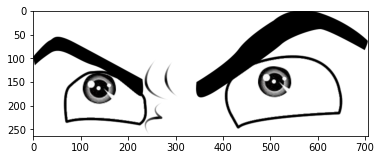

In [4]:
plt.imshow(eyes_img)
plt.show()
# cv2.imshow('eyes', eyes_img)
# cv2.waitKey()
# cv2.destroyAllWindows()

### Show Search Image 

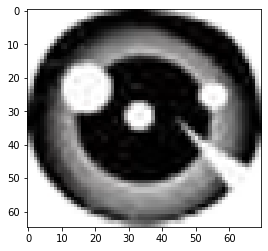

In [5]:
plt.imshow(pupil_img)
plt.show()

# cv2.imshow('pupil', pupil_img)
# cv2.waitKey()
# cv2.destroyAllWindows()

## Template Matching
<ul>
    <li>There are 6 comparison methods</li>
    <ul>
        <li>TM_CCOEFF</li>
        <li>TM_CCOEFF_NORMED</li>
        <li>TM_CCORR</li>
        <li>TM_CCORR_NORMED</li>
        <li>TM_SQDIFF</li>
        <li>TM_SQDIFF_NORMED</li>
    </ul>
    <li><a href="https://docs.opencv.org/master/d4/dc6/tutorial_py_template_matching.html">OpenCV Template Matching Docs</a></li>
</ul>

In [6]:
# There are 6 comparison methods to choose from:
# TM_CCOEFF, TM_CCOEFF_NORMED, TM_CCORR, TM_CCORR_NORMED, TM_SQDIFF, TM_SQDIFF_NORMED
# You can see the differences at a glance here:
# https://docs.opencv.org/master/d4/dc6/tutorial_py_template_matching.html
result = cv2.matchTemplate(eyes_img, pupil_img, cv2.TM_CCOEFF_NORMED)

### View Result

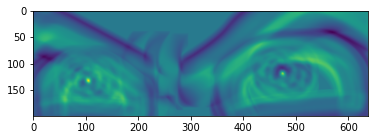

In [7]:
plt.imshow(result)
plt.show()


# cv2.imshow('Result', result)
# cv2.waitKey()
# cv2.destroyAllWindows()

### Get Max Result

In [8]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

In [9]:
max_loc

(105, 132)

In [10]:
max_val

0.5314282178878784

### Paint Square on Main Image

In [11]:
w = pupil_img.shape[1]
h = pupil_img.shape[0]

In [12]:
cv2.rectangle(eyes_img, max_loc, (max_loc[0] + w, max_loc[1] + h), (0,255,255), 2)

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

## Paint Multiple Squares

In [13]:
threshold = .40

In [14]:
yloc, xloc = np.where(result >= threshold)

In [15]:
len(xloc)

16

In [20]:
for (x, y) in zip(xloc, yloc):
    cv2.rectangle(eyes_img, (x, y), (x + w, y + h), (50,200,200), 2)

In [ ]:
plt.imshow(eyes_img)
plt.show()

# cv2.imshow('eyes', eyes_img)
# cv2.waitKey()
# cv2.destroyAllWindows()

QApplication: invalid style override 'adwaita' passed, ignoring it.
	Available styles: Windows, Fusion


In [156]:
# What is a rectangle?
# x, y, w, h
rectangles = []
for (x, y) in zip(xloc, yloc):
    rectangles.append([int(x), int(y), int(w), int(h)])
    rectangles.append([int(x), int(y), int(w), int(h)])

In [157]:
len(rectangles)

26

In [158]:
rectangles, weights = cv2.groupRectangles(rectangles, 1, 0.2)

In [159]:
rectangles

array([[731, 237,  66,  41],
       [603, 301,  66,  41],
       [731, 301,  66,  41],
       [539, 333,  66,  41],
       [603, 365,  66,  41]], dtype=int32)

In [160]:
len(rectangles)

5